In [1]:
#importing relevant libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import os,sys
from scipy import stats
from sklearn import metrics

In [2]:
#import dataset Bank_Personal_Loan_Modelling

bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
#Check datatype, shape, statistical summary and null values

print(bank.info())
print()
print(bank.shape)
print()
print(bank.describe())
print()
print(bank.isnull().sum())
bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

(5000, 14)

                ID          Age   Expe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#number of unique values in each column

bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [5]:
#number of people with zero mortgage is 3462
bank['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [6]:
#number of people with zero creadit card spending is 106
bank.query('CCAvg == 0').CCAvg.count()

106

In [7]:
#value count of categorical columns family, education,personal loan,securities account,cd account,online,creadit card
family_Count = bank['Family'].value_counts()
print (family_Count)
edu_Count = bank['Education'].value_counts()
print (edu_Count)
perl_Count = bank['Personal Loan'].value_counts()
print (perl_Count)
sacc_Count = bank['Securities Account'].value_counts()
print (sacc_Count)
cd_Count = bank['CD Account'].value_counts()
print (cd_Count)
online_Count = bank['Online'].value_counts()
print (online_Count)
cc_Count = bank['CreditCard'].value_counts()
print (cc_Count)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [8]:
#apply one-hot encoding on Education Column
bank1 = pd.get_dummies(bank, columns= ['Education'])
bank1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [9]:
#dropping column 'ID' and 'ZIP Code' due to irrelevancy

bank2 = bank1.drop(['ID','ZIP Code'], axis =1)
bank2.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


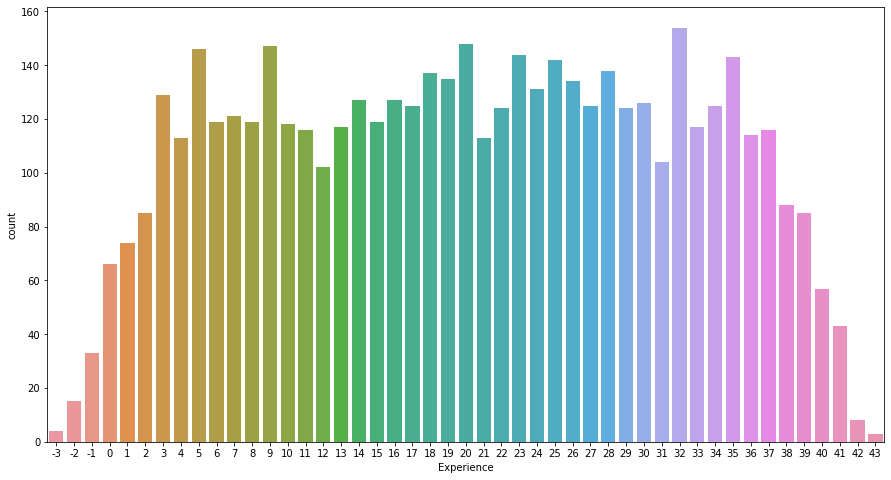

In [10]:
#plotting Experience

plt.figure(figsize=(15,8))
sns.countplot(bank2['Experience'])

In [11]:
#replace negative values with positive values
#another option is to replace with mean since the dtata distribution is good

bank2[bank2<0]=20

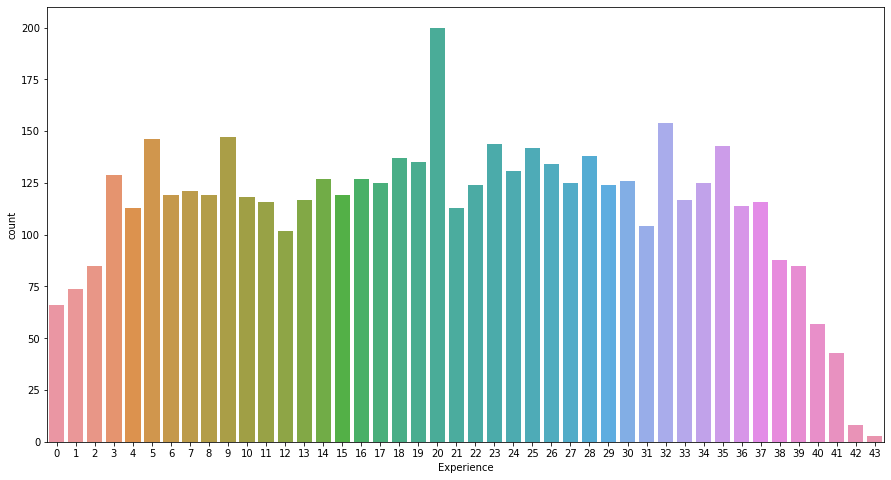

In [12]:

plt.figure(figsize=(15,8))
sns.countplot(bank2['Experience'])

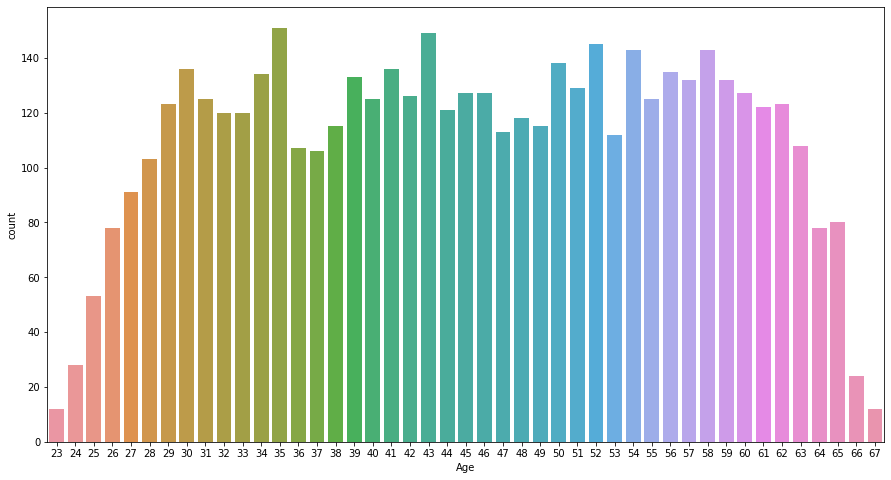

In [13]:
#plot Age column

plt.figure(figsize=(15,8))
sns.countplot(bank['Age'])

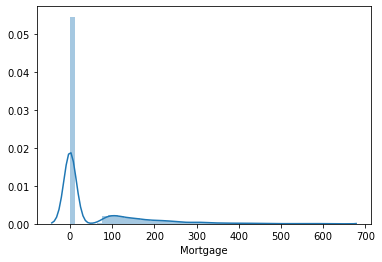

In [14]:
sns.distplot(bank['Mortgage'],kde=True)
plt.show()

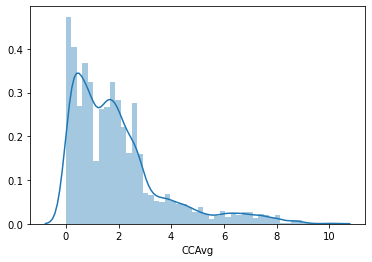

In [15]:
sns.distplot(bank['CCAvg'],kde=True)
plt.show()

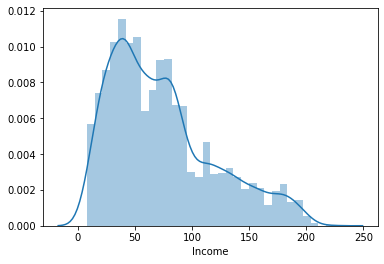

In [16]:
sns.distplot(bank['Income'],kde=True)
plt.show()

In [17]:
#there is no need to plot categorical columns since they have been counted earlier in a previous step

In [18]:
bank2.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.027770,-0.016264,0.045838
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834,-0.007480,-0.017353,0.025063
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,0.218019,-0.128364,-0.108878
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.118628,0.139201,-0.008744
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,0.156979,-0.090366,-0.080413
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,0.042841,-0.031806,-0.014942
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,-0.148894,0.071491,0.090212
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.006863,0.005134,-0.012421
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,-0.014630,0.006089,0.009780
Online,0.013702,0.013459,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,0.003394,0.020590,-0.023837


In [19]:
def plot_corr(bank2, size=11):
    corr = bank2.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

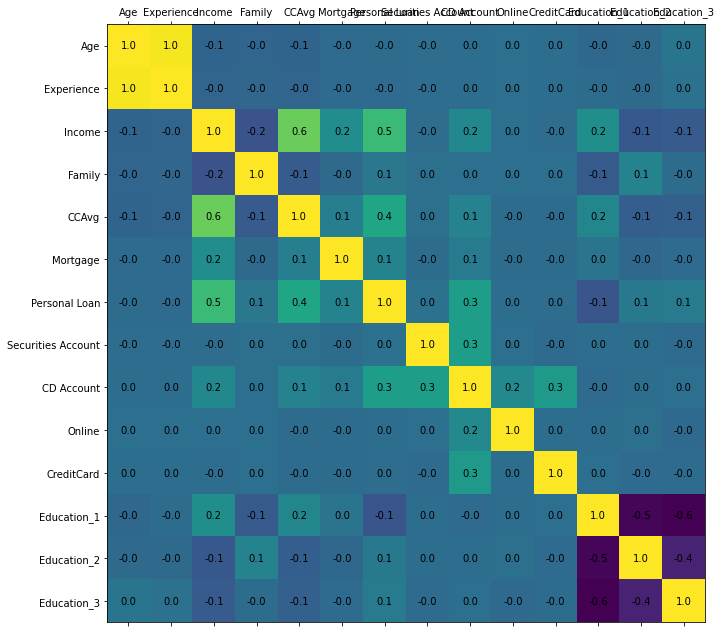

In [20]:
plot_corr(bank2)

In [21]:
#dropping column 'Experience' due to high correlation with 'Age'
#remain 'Age' as correlation with target variable 'Personal Loan' is almost zero

bank3 = bank2.drop(['Experience'], axis =1)
bank3.head()

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,0,0,1,0,1,0


In [22]:
def plot_corr(bank3, size=16):
    corr = bank3.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

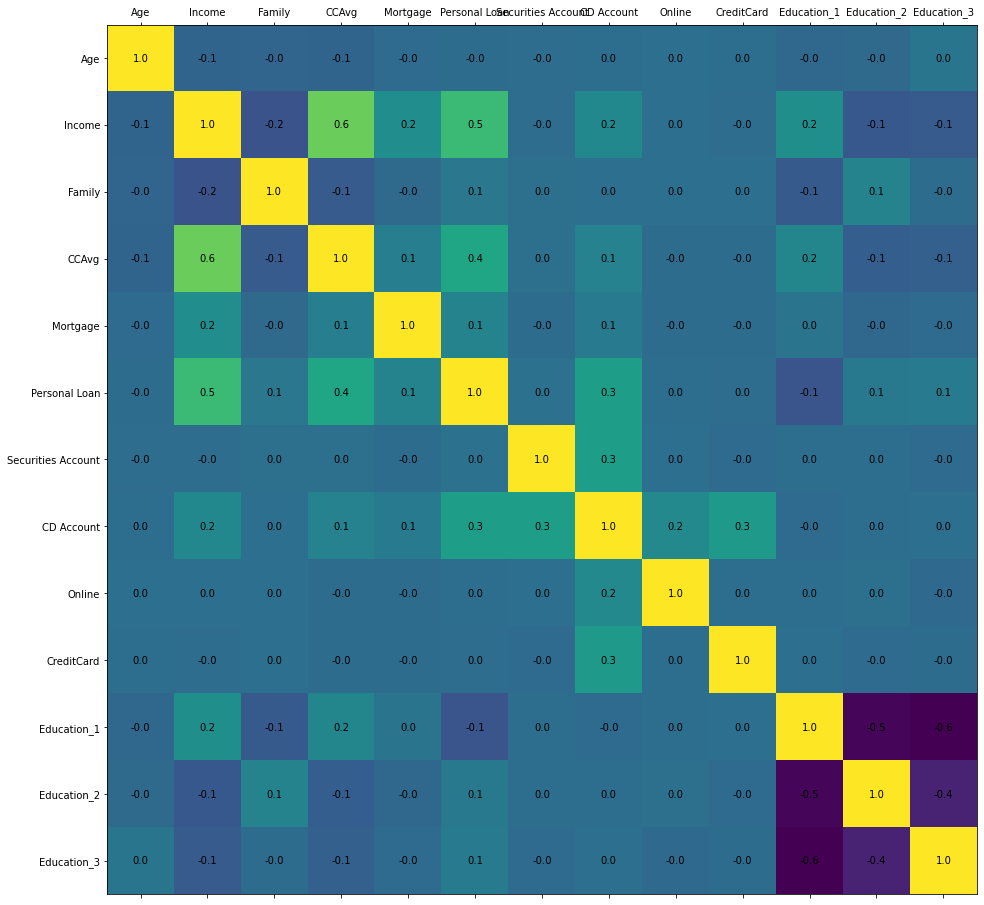

In [23]:
plot_corr(bank3)

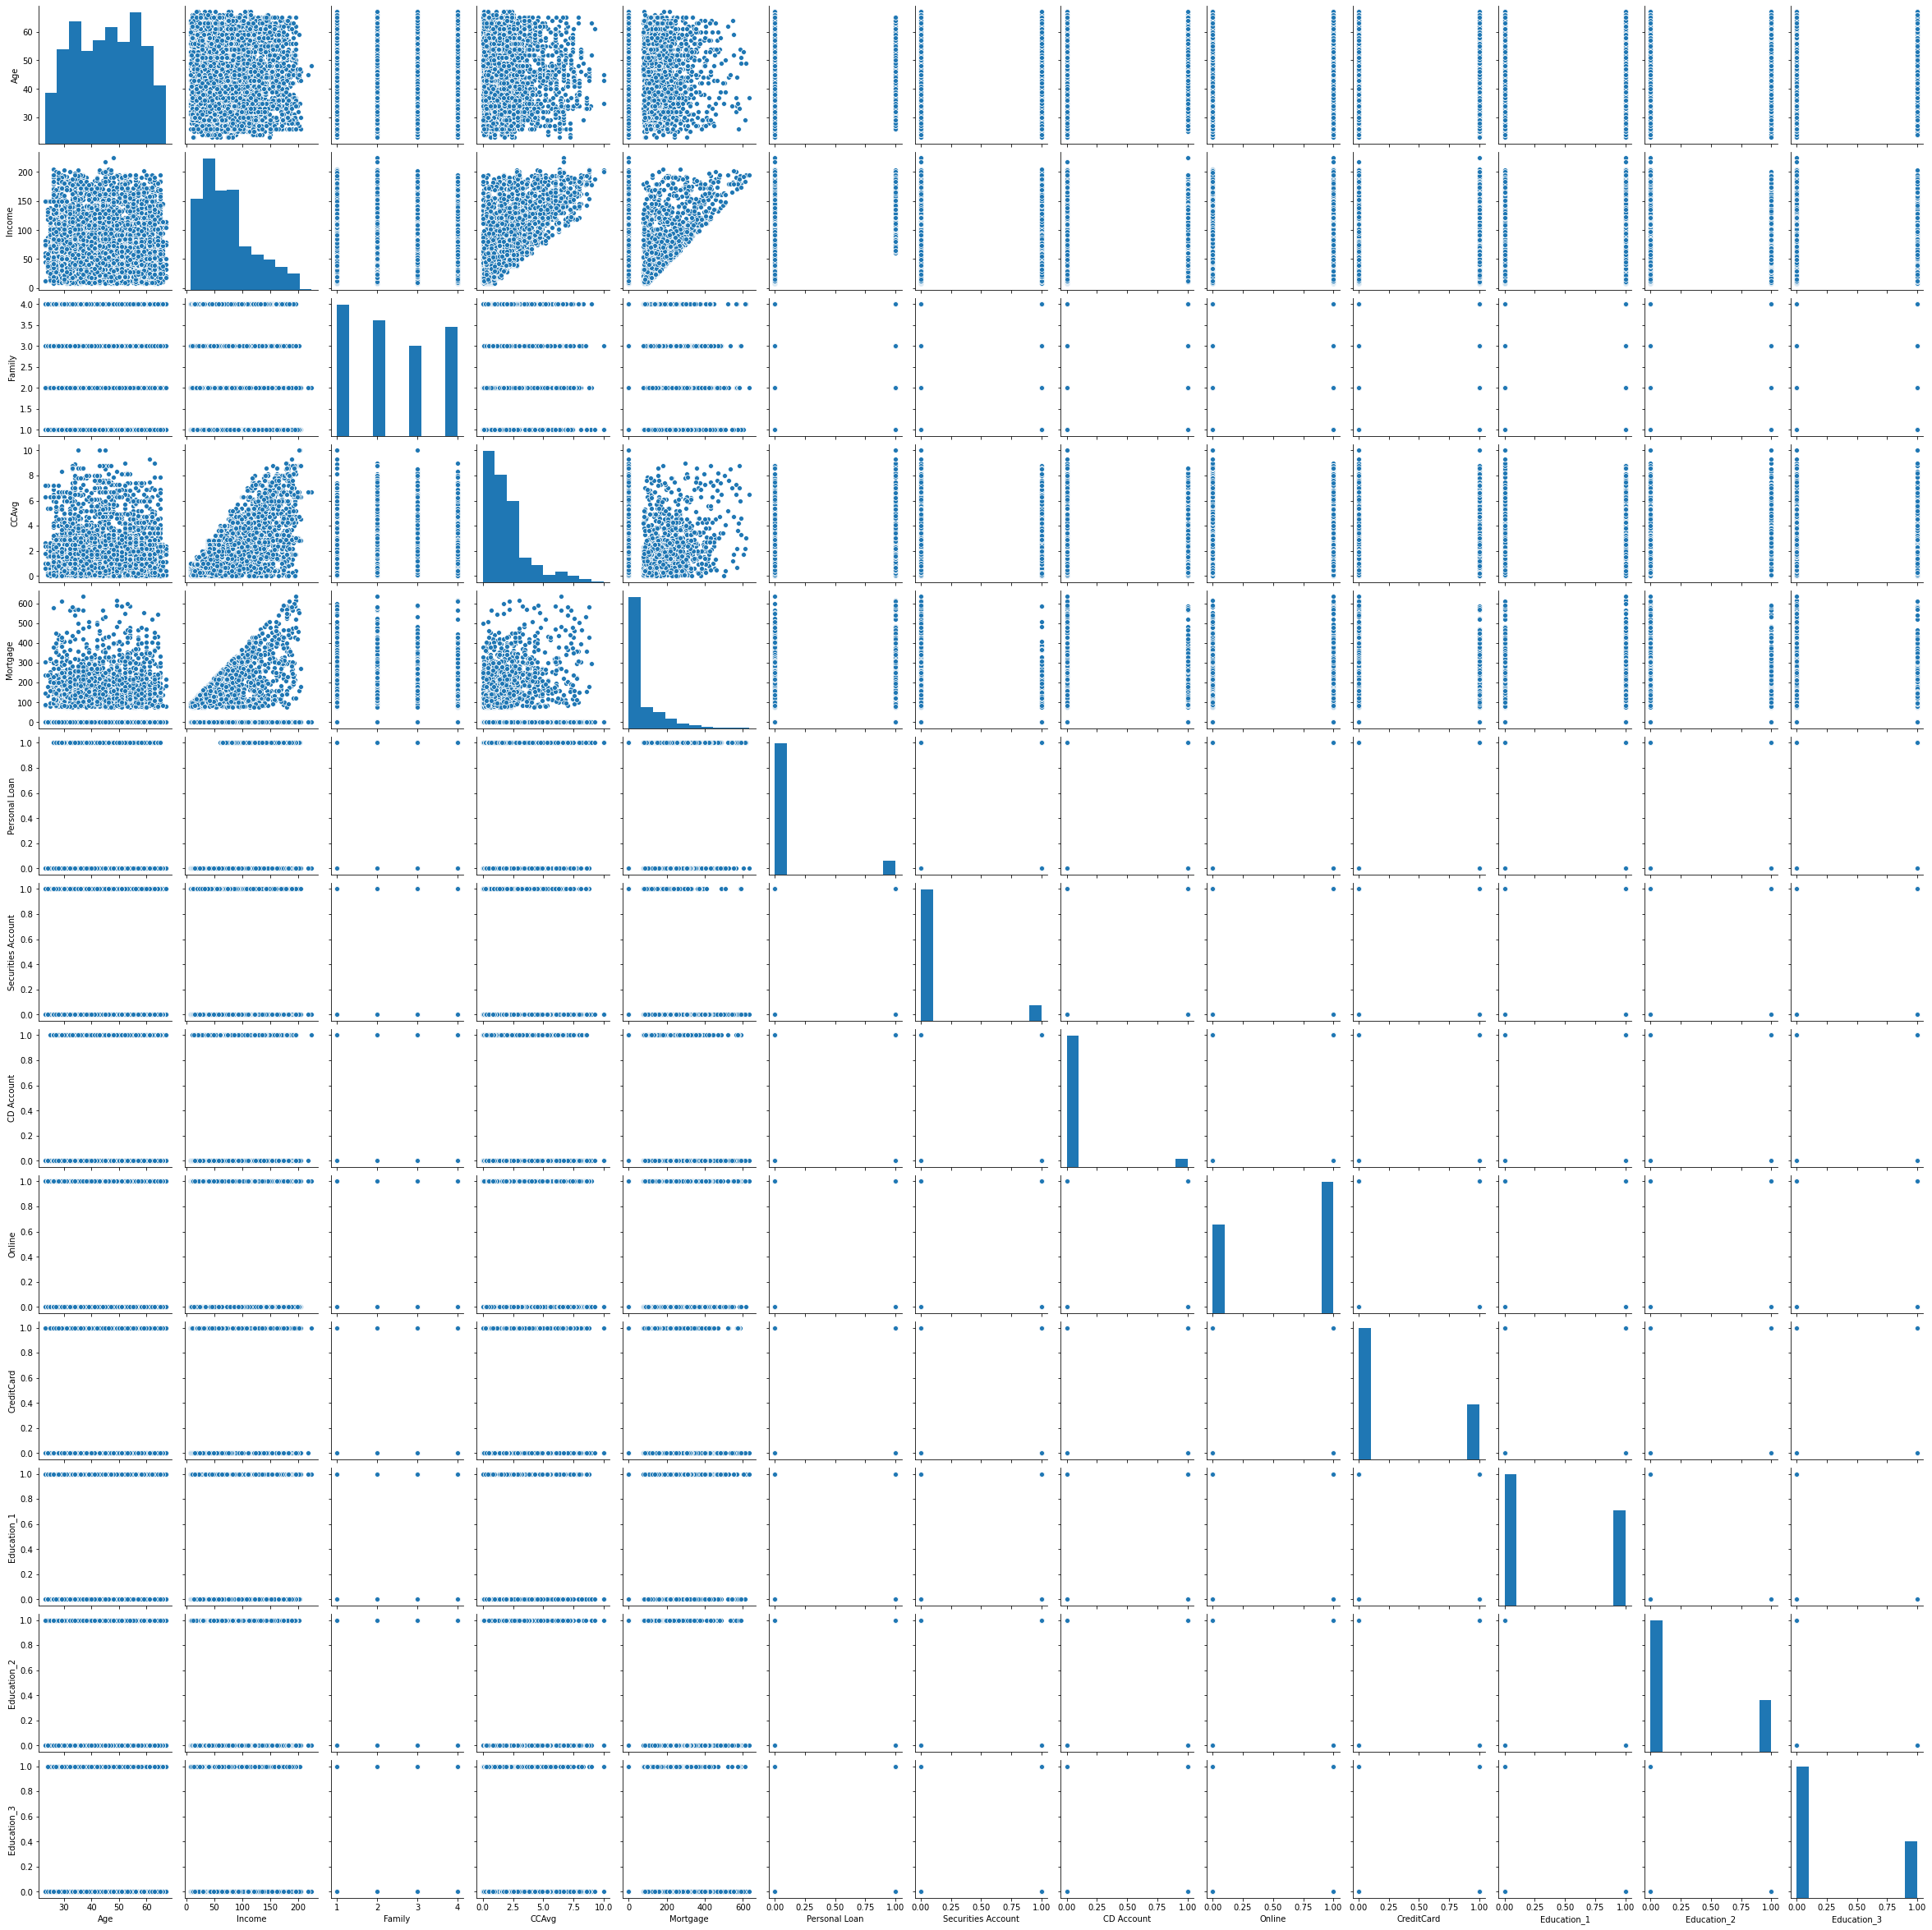

In [24]:
sns.pairplot(bank3)

In [25]:
# independant variables
X = bank3.drop(['Personal Loan','Education_2'], axis=1)
# the dependent variable
Y = bank3[['Personal Loan']]

In [26]:
#spliting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [27]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(Y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.114097
         Iterations 9


In [28]:
#Summary of logistic regression

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6355
Time:                        00:52:05   Log-Likelihood:                -399.34
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                5.679e-292
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.5340      0.685    -13.920      0.000     -10.876      -8.192
Age                    0.0052      0.008      0.640      0.522      -0.011       0.021
Income              

In [29]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
Y_predict = logreg.predict(X_test)

In [31]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9548571428571428

Testing accuracy 0.956

Confusion Matrix


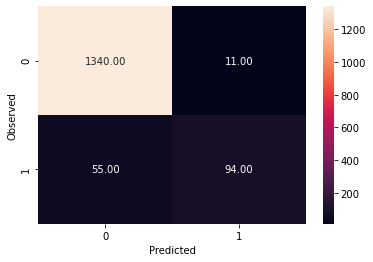

None

Recall: 0.6308724832214765

Precision: 0.8952380952380953

F1 Score: 0.7401574803149606

Roc Auc Score: 0.8113651831355347


In [33]:
print("Trainig accuracy",logreg.score(X_train,Y_train))  
print()
print("Testing accuracy",logreg.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

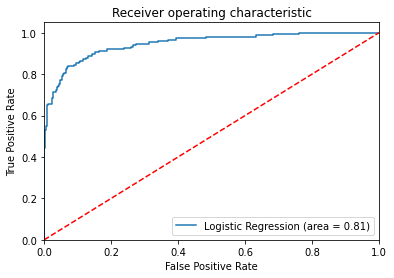

In [34]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.5,solver=i)  # changing values of solver
    model.fit(X_train, Y_train) 
    Y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.957, 0.958, 0.958, 0.901, 0.897]

[0.957, 0.956, 0.951, 0.892, 0.892]


In [36]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, Y_train) 
    Y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.958, 0.897]

[0.958, 0.892]


In [38]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, Y_train) 
    Y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,Y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, Y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.914, 0.955, 0.958, 0.958, 0.958, 0.958]

[0.903, 0.951, 0.957, 0.957, 0.958, 0.958]


Trainig accuracy 0.958

Testing accuracy 0.958

Confusion Matrix


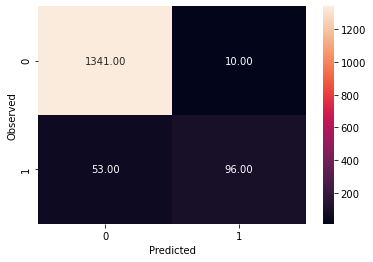

None

Recall: 0.6442953020134228

Precision: 0.9056603773584906

F1 Score: 0.7529411764705881

Roc Auc Score: 0.8184466887565263


In [40]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=0.75) 
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

In [ ]:
#by tweaking the model parameters a better model can be obtained

#                original vs improved model
#recall           63.1%   vs    64.4%
#precisioin       89.5%   vs    90.5%
#F1 score         74.0%   vs    75.2%
# ROC AUC score   81.1%   vs    81.8%

In [41]:
# the model building appraoch should have considered the real life bank terminology, and hence the model should deal only
#with liability customers, not the whole data set.
#regardless, the expected conversion rate to personal loan is lower compared to last year, that is due to the imbalance in 
#the dataset given, and a better model can be obtained by focusing on the right customers as i mentioned earlier.
#pursuing that apprach would also ensure lower budget expenditure that is due to the focused campaign target, rather than
#appraching all customers.